# Inicio del TP

## Introducción

  Como primer medida como a lo largo del TP se va a necesitar generar datos en forma de diagonales, paralelas y espirales vamos a definir estas al inicio e ir usándolas a medida que se vaya necesitando.


In [1]:
import time
import math
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from IPython.display         import display
from sklearn.tree            import DecisionTreeClassifier
from sklearn                 import tree
from sklearn.metrics         import accuracy_score
from sklearn.model_selection import train_test_split


In [2]:
# Diagonales

def diagonales(n, d, C):
  mean0 = np.full(d,-1)
  mean1 = np.full(d,1)
    
  desviacion_std = C * np.sqrt(d)
  covarianza = np.diag(np.full(d,desviacion_std)**2)
    
  input0 = np.random.multivariate_normal(mean0, covarianza, n//2)
  input1 = np.random.multivariate_normal(mean1, covarianza, n//2)
    
  output0 = np.full(n//2, 0)  
  output1 = np.full(n//2, 1)
    
  df = pd.DataFrame({
      'input': np.concatenate([input0,input1]).tolist(), 
      'output': np.concatenate([output0, output1]).tolist()
  })

  return df


# Paralelas

def paralelas(n, d, C):
  mean0 = np.zeros(d)
  mean1 = np.zeros(d)
  mean0[0] = 1
  mean1[0] = -1

  desviacion_std = C
  covarianza = np.diag(np.full(d,desviacion_std)**2)
    
  input0 = np.random.multivariate_normal(mean0, covarianza, n//2)
  input1 = np.random.multivariate_normal(mean1, covarianza, n//2)
    
  output0 = np.full(n//2, 0)  
  output1 = np.full(n//2, 1)
    
  df = pd.DataFrame({
      'input': np.concatenate([input0,input1]).tolist(), 
      'output': np.concatenate([output0, output1]).tolist()
  })

  return df


# Espirales

def toCartesianP(r, theta):
  x = r * np.cos(theta)
  y = r * np.sin(theta)
  return (x, y)

def toCartesianA(rs, thetas):
  a = [(r * np.cos(theta), r * np.sin(theta)) for r, theta in zip(rs, thetas)]
  return a

def espirales(n):
  r0s = np.sqrt(np.random.uniform(0, 1, n//2))  
  a0s = np.random.uniform(0, 1, n//2)
  theta0s = [np.pi*(4*r-a) for r,a in zip(r0s,a0s)]

  r1s = np.sqrt(np.random.uniform(0, 1, n//2))
  a1s = np.random.uniform(-1, 0, n//2)
  theta1s = [np.pi*(4*r-a) for r,a in zip(r1s,a1s)]

  input0 = toCartesianA(r0s,theta0s)
  input1 = toCartesianA(r1s,theta1s)

  output0 = np.full(n//2, 0)
  output1 = np.full(n//2, 1)

  df = pd.DataFrame({
      'input': np.concatenate([input0,input1]).tolist(), 
      'output': np.concatenate([output0,output1]).tolist()
  })

  return df

En el TP vamos a clasificar los datos usando un arbol de decision con los siguientes parametros:


In [3]:
Tree = lambda: DecisionTreeClassifier(criterion="entropy",min_impurity_decrease=0.002,random_state=0,min_samples_leaf=5)

Donde:
* **criterion**: Decide que estrategia usar para decidir en que parámetros hacer un split.
El valor "entropy" utiliza el criterio de entropía y ganancia de información visto en clase.

* **min_impurity_decrease**: Este valor controla si un split se realizara o no. Se realizara un nodo
en un split si la reducción de la entropía después de este split es mayor a este valor. Un árbol
con un *min_impurity_decrease* bajo tendera a realizar mas splits que uno con un valor alto.

* **random_state**: Este valor es la semilla para el generador de números aleatorios y determina como se
comportara el árbol cuando se sigue un procedimiento que dependa de la aleatoriedad (como por ejemplo mezclar
una lista). Un valor fijo de 0 indica que el árbol realizara el mismo procedimiento en multiples llamadas lo
que aumenta la reproducibilidad.

* **min_samples_leaf**: Controla cuantos valores tiene que haber en cada hoja del árbol luego de un split. Un valor
de 5 indica que un nodo sera candidato a un split si y solo si luego de realizarlo hay al menos 5 nodos tanto a la
izquierda como a la derecha del split.

## Ejercicio 1

Generamos 3 conjuntos de entrenamiento para nuestro arbol, correspondientes al
problema de las espirales, de diferentes longitudes; 150, 600 y 3000. 

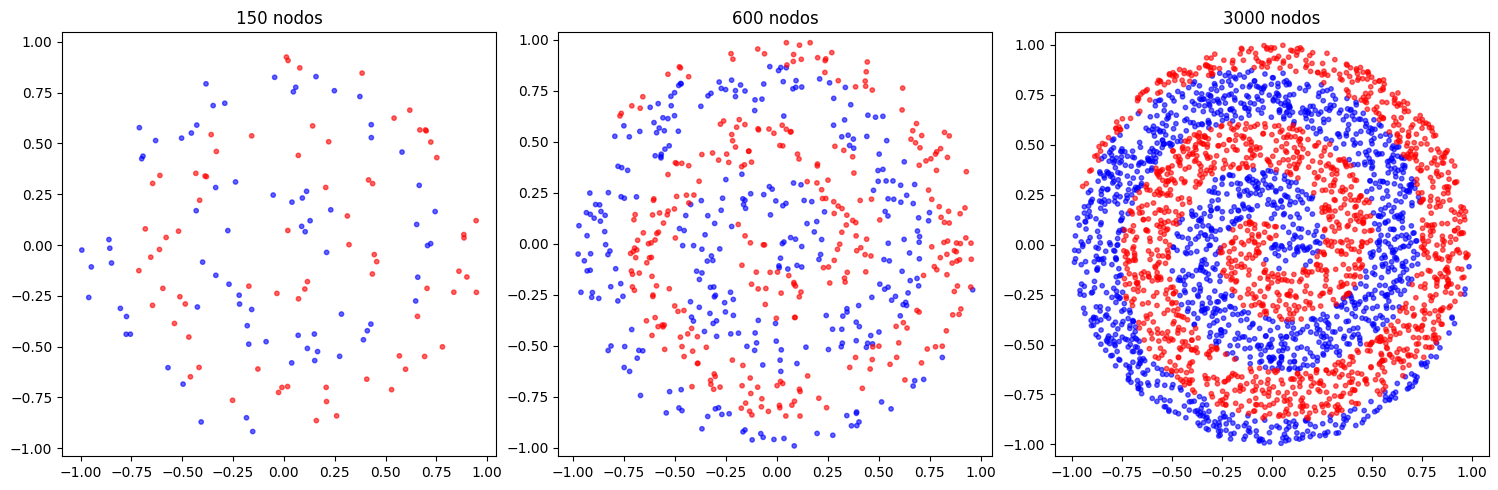

In [4]:
e1 = espirales(150)
e2 = espirales(600)
e3 = espirales(3000)

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

for ax, data, title in zip(
    axs, [e1, e2, e3], ['150 nodos', '600 nodos', '3000 nodos']):

    x = [p[0] for p in data['input']]
    y = [p[1] for p in data['input']]
    c = data['output']

    ax.scatter(x, y, c=c, cmap='bwr', alpha=0.6, s=10)
    ax.set_title(title)
    
    ax.axis('equal')
    ax.axis('on')

plt.tight_layout()
plt.show()

Y un conjunto de prueba usando 10000 puntos de las espirales:

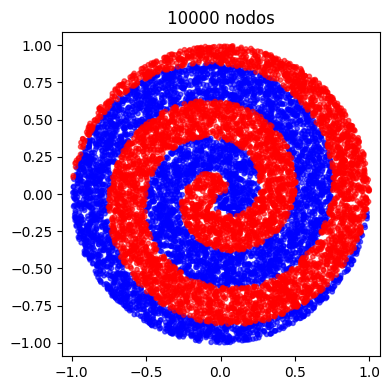

In [5]:
plt.figure(figsize=(4, 4))
test = espirales(10000)

x = [p[0] for p in test['input']]
y = [p[1] for p in test['input']]
c = test['output']

plt.scatter(x, y, c=c, cmap='bwr', alpha=0.6, s=10)
plt.title("10000 nodos")

plt.axis('equal')
plt.axis('on')

plt.tight_layout()
plt.show()

Entrenamos el arbol de decision a partir de cada uno de los conjunto definidos previamente. Lo cual nos genera los siguientes arboles de ejemplo.

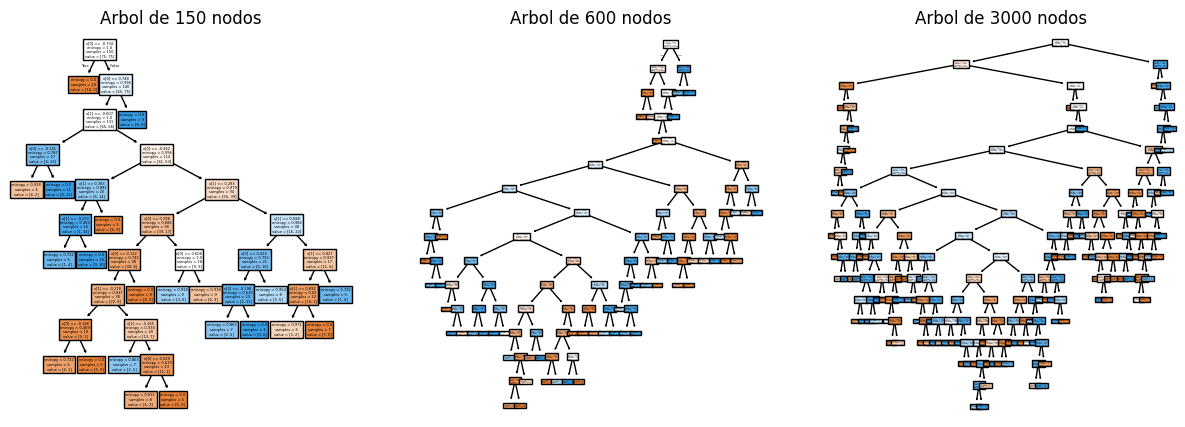

In [6]:
t1 = Tree()
t2 = Tree()
t3 = Tree()

t1.fit(e1['input'].tolist(), e1['output'].tolist())
t2.fit(e2['input'].tolist(), e2['output'].tolist())
t3.fit(e3['input'].tolist(), e3['output'].tolist())

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

for ax, t, title in zip(
    axs, [t1, t2, t3], ['Arbol de 150 nodos', 'Arbol de 600 nodos', 'Arbol de 3000 nodos']):

    tree.plot_tree(t, filled=True, ax=ax)

    ax.set_title(title)
    

plt.show()
plt.show()

A medida que aumentan los puntos generados aumenta la cantidad de nodos del árbol. Esto se debe a dos razones, 
1. Nuestro árbol de decision tiene un *min_impurity_decrease* muy bajo (0.02) esto hace que tienda a hacer muchos splits. 
2. El valor de *min_sample_leaf* hace que el árbol eventualmente deje de hacer splits para mantener la cantidad de valores en las hojas alto, lo que efectivamente reduce la altura de los arboles y hace que termine antes cuando hay menos nodos.  

Podemos ver que tan bien predicen los arboles si probamos que tan bien predicen los datos del conjunto de test.

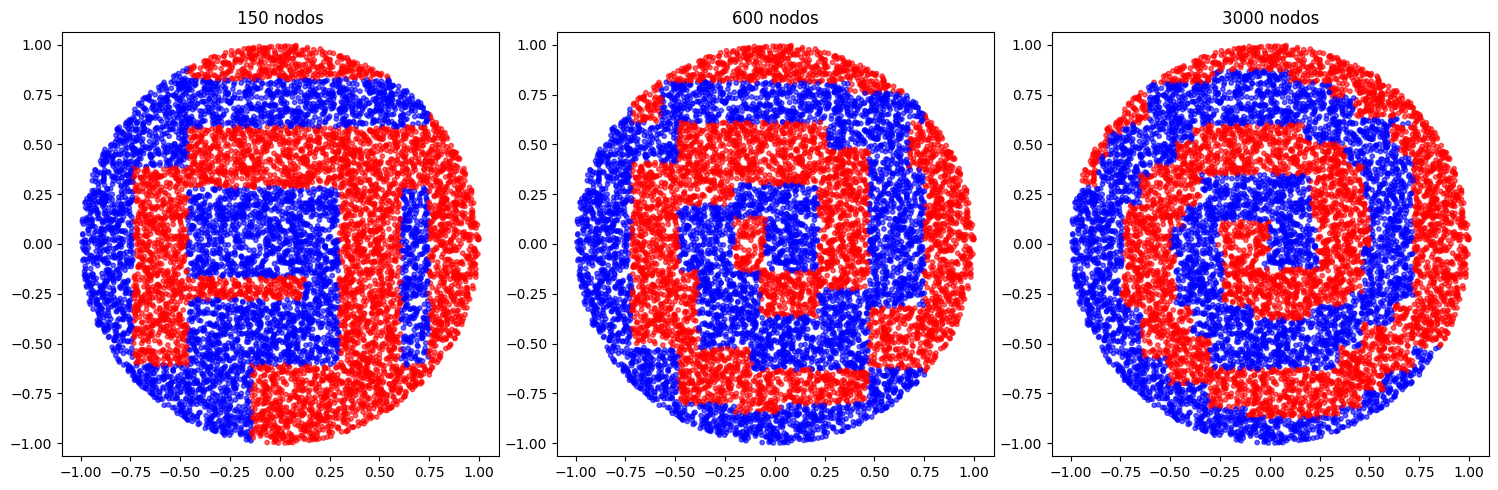

In [7]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

for ax, t, title in zip(
    axs, [t1, t2, t3], ['150 nodos', '600 nodos', '3000 nodos']):

    x = [p[0] for p in test['input']]
    y = [p[1] for p in test['input']]
    c = t.predict(test['input'].tolist())

    ax.scatter(x, y, c=c, cmap='bwr', alpha=0.6, s=10)
    ax.set_title(title)
    
    ax.axis('equal')
    ax.axis('on')

plt.tight_layout()
plt.show()

A medida que aumenta la cantidad de nodos que se usan para entrenamiento las predicciones sobre el conjunto de test son más precisas. Esto se debe a dos razones:

1. El árbol de decision que usamos hace splits siempre que puede debido a que tiene un *min_impurity_decrease* muy bajo(hace muchos splits) y un *min_sample_leaf* muy bajo(la altura del árbol de decision aumenta mucho). Por lo que el árbol hace una exploración exhaustiva del conjunto de entrenamiento.

2. A medida que agarramos mas nodos para entrenar obtenemos una muestra más significativa del conjunto de entrenamiento (porque los puntos se generan de manera uniforme). Asi que es más un probable que un árbol que predice muy bien sobre un conjunto grande prediga bien sobre el conjunto de test. 

---

## Ejercicio 2

Tenemos que generar 20 conjuntos de entrenamiento usando la siguiente cantidad de puntos; 125, 250, 500, 1000, 2000, 4000.

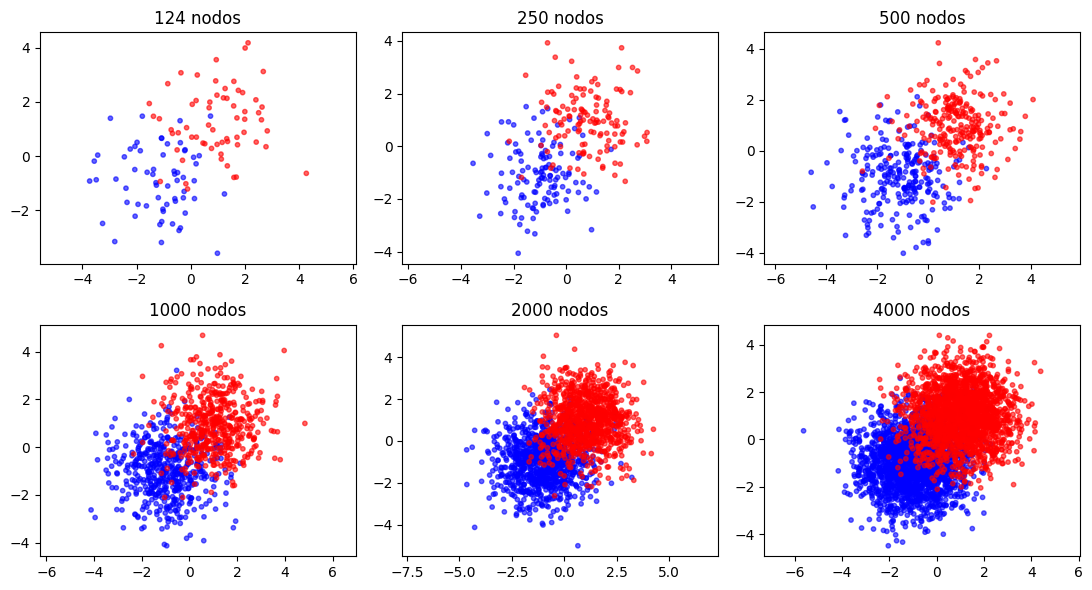

In [8]:
sizes = [125, 250, 500, 1000, 2000, 4000]

fig, axs = plt.subplots(2, 3, figsize=(11, 6))

diag = lambda n: diagonales(n, 2, 0.78)

datas = [diag(sz) for sz in sizes]

axs = axs.reshape(-1)  

for ax, data in zip(axs, datas):
    x = [p[0] for p in data['input']]
    y = [p[1] for p in data['input']]
    c = data['output']

    ax.scatter(x, y, c=c, cmap='bwr', alpha=0.6, s=10)
    
    title = f"{len(data)} nodos"
    ax.set_title(title)
    
    ax.axis('equal')
    ax.axis('on')

plt.tight_layout()
plt.show()

Tambien generamos un conjunto de prueba usando 10000 nodos.

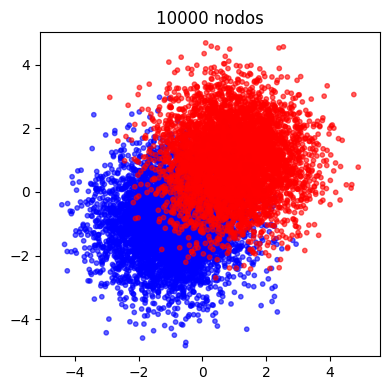

In [9]:
plt.figure(figsize=(4, 4))
test = diag(10000)

x = [p[0] for p in test['input']]
y = [p[1] for p in test['input']]
c = test['output']

plt.scatter(x, y, c=c, cmap='bwr', alpha=0.6, s=10)
plt.title("10000 nodos")

plt.axis('equal')
plt.axis('on')

plt.tight_layout()
plt.show()

En primer lugar generamos una grafica para ver como son las predicciones para cada punto para un arbol generado por las muestras de entrenamiento anteriores.

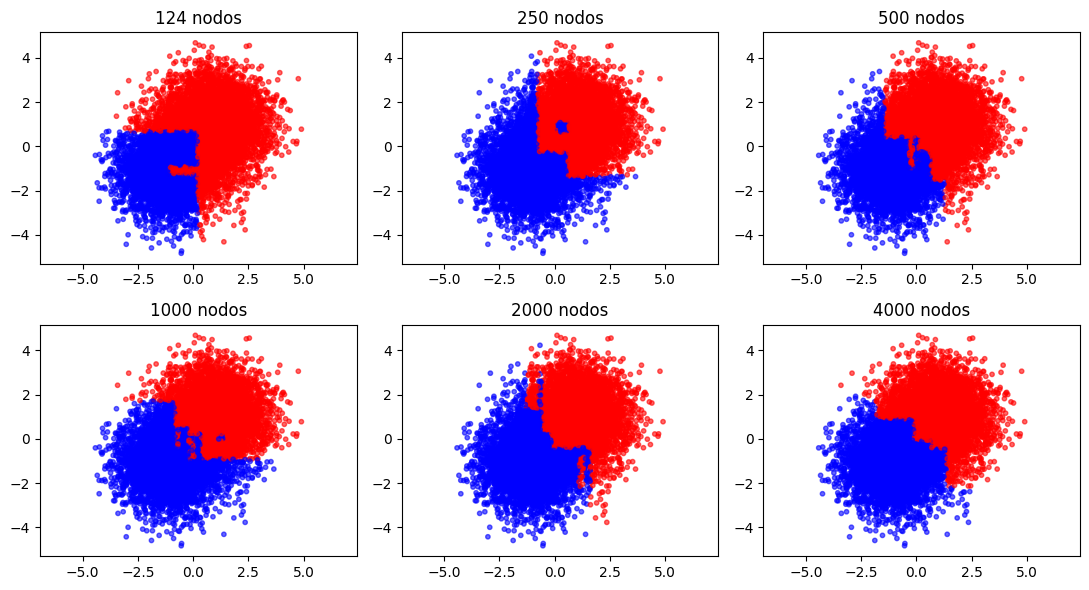

In [10]:
t = Tree()

fig, axs = plt.subplots(2, 3, figsize=(11, 6)) 

axs = axs.ravel() 

for ax, data in zip(axs, datas):

    # Entreno el árbol con los datos
    t.fit(data['input'].tolist(), data['output'].tolist())

    # Genero la gráfica
    x = [p[0] for p in test['input']]
    y = [p[1] for p in test['input']]
    c = t.predict(test['input'].tolist())

    ax.scatter(x, y, c=c, cmap='bwr', alpha=0.6, s=10)
    
    title = f"{len(data)} nodos"
    ax.set_title(title)
    
    ax.axis('equal')
    ax.axis('on')

plt.tight_layout()
plt.show()

A medida que se va aumentando la cantidad de nodos del árbol se puede ver que la frontera entre las dos areas se va modificando. Esta modificación consiste en pasar de una frontera casa "vertical" a una "escalonada" (creemos que se tienda mas a una frontera "diagonal" en vez de una "escalonada").

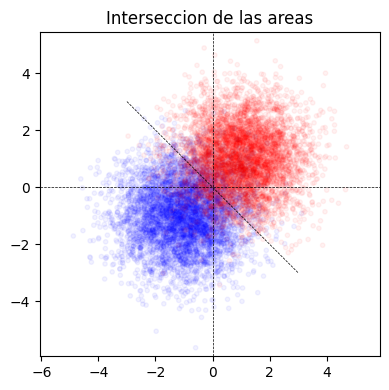

In [11]:
plt.figure(figsize=(4, 4))
test = diag(10000)

x = [p[0] for p,c in zip(test['input'], test['output'])]
y = [p[1] for p,c in zip(test['input'], test['output'])]

c = test['output']

plt.scatter(x, y,c=c, cmap='bwr', alpha=0.05, s=10)
plt.title("Interseccion de las areas")

# Setear los limite de los ejes en (-3,3)
plt.xlim(-3, 3)
plt.ylim(-3, 3)

# Poner el centro en (0,0)
plt.axhline(0, color='black', lw=0.5, ls='--')
plt.axvline(0, color='black', lw=0.5, ls='--')

# marcar la recta y=-x
plt.plot([-3, 3], [3, -3], color='black', lw=0.5, ls='--')

plt.axis('equal')
plt.axis('on')

plt.tight_layout()
plt.show()

¿Porque pasa esto? En todo momento el árbol intenta minimizar la entropía, una menor entropía indica que los elementos del conjunto están menos mezclados y por lo tanto es más fácil clasificar a los elementos del mismo como de una sola clase.

![titulo](entropia.webp)

La mejor forma de dividir los elementos de las diagonales (y por lo tanto conseguir una menor entropía) es por la linea de intersección de las normales. Por lo tanto un árbol que intenta minimizar este parámetro se aproximara cada vez mas a esta linea divisora.

Algo similar ocurre si repetimos el experimento con los datos de "paralelas".

Generamos 20 conjuntos de ejemplo y un conjunto de test (con los mismos tamaños que en diagonales).

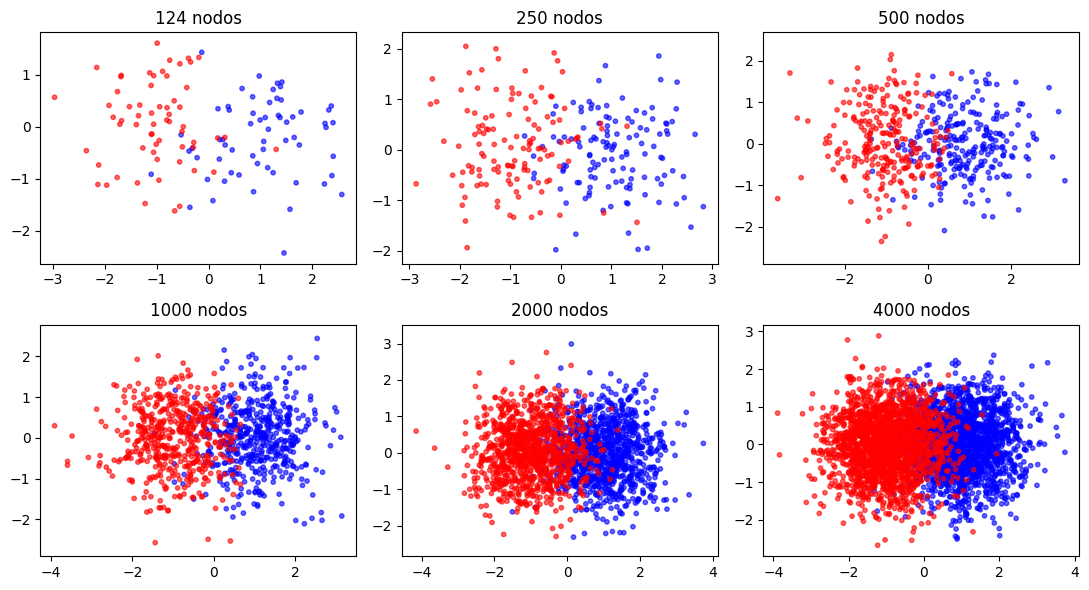

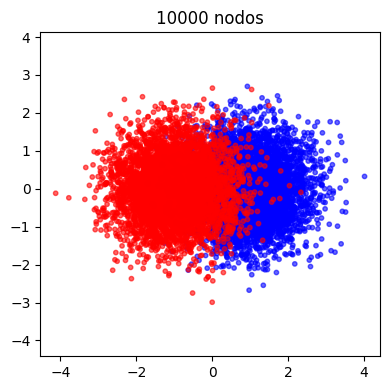

In [12]:
sizes = [125, 250, 500, 1000, 2000, 4000]

fig, axs = plt.subplots(2, 3, figsize=(11, 6))  

diag = lambda n: paralelas(n, 2, 0.78)

datas = [diag(sz) for sz in sizes]

axs = axs.reshape(-1)  

for ax, data in zip(axs, datas):
    x = [p[0] for p in data['input']]
    y = [p[1] for p in data['input']]
    c = data['output']

    ax.scatter(x, y, c=c, cmap='bwr', alpha=0.6, s=10)
    
    title = f"{len(data)} nodos"
    ax.set_title(title)
    
    ax.axis('equal')
    ax.axis('on')

plt.tight_layout()
plt.show()


# Conjunto de test

plt.figure(figsize=(4, 4))
test = diag(10000)

x = [p[0] for p in test['input']]
y = [p[1] for p in test['input']]
c = test['output']

plt.scatter(x, y, c=c, cmap='bwr', alpha=0.6, s=10)
plt.title("10000 nodos")

plt.axis('equal')
plt.axis('on')

plt.tight_layout()
plt.show()

Ahora entrenamos un arbol con los conjuntos de ejemplo:

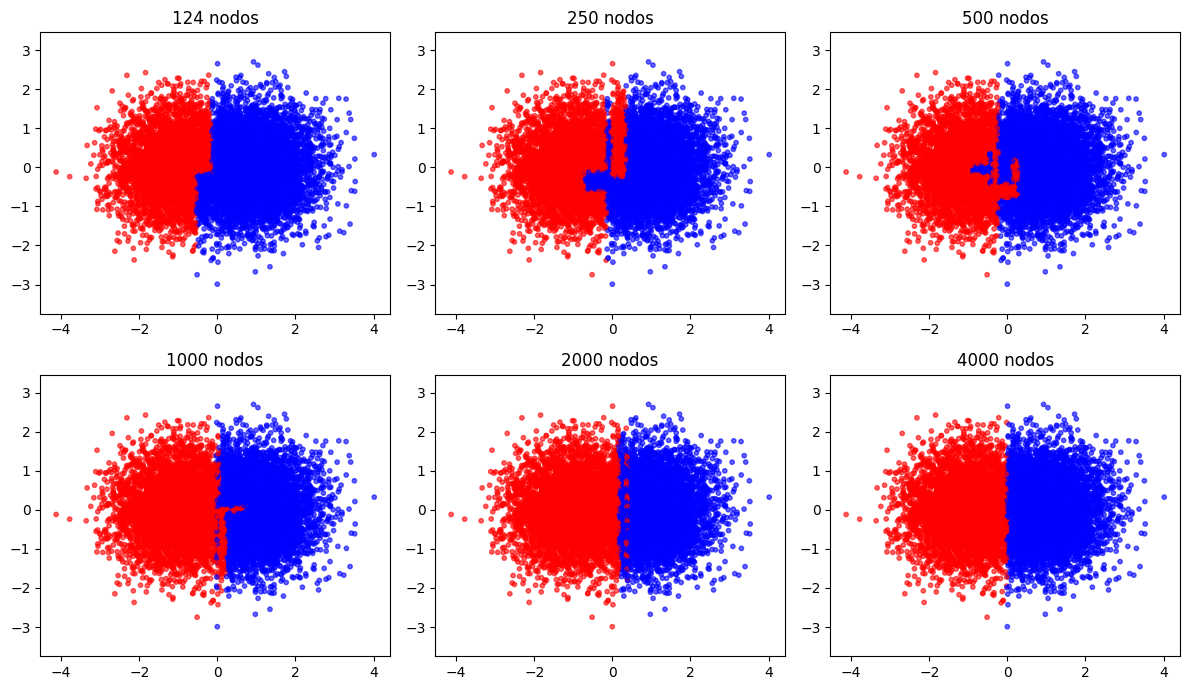

In [13]:
t = Tree()

fig, axs = plt.subplots(2, 3, figsize=(12, 7))  

axs = axs.ravel() 

for ax, data in zip(axs, datas):

    # Entreno el árbol con los datos
    t.fit(data['input'].tolist(), data['output'].tolist())

    # Genero la gráfica
    x = [p[0] for p in test['input']]
    y = [p[1] for p in test['input']]
    c = t.predict(test['input'].tolist())

    ax.scatter(x, y, c=c, cmap='bwr', alpha=0.6, s=10)
    
    title = f"{len(data)} nodos"
    ax.set_title(title)
    
    ax.axis('equal')
    ax.axis('on')

plt.tight_layout()
plt.show()

En este caso la linea divisora que minimiza la entropía es la linea que vertical que pasa por el origen de coordenadas, esto lo podemos ver si graficamos los datos con menor transparencia.

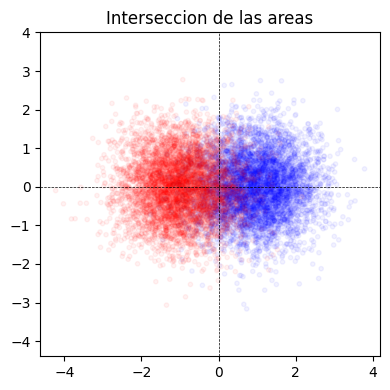

In [14]:
plt.figure(figsize=(4, 4))
test = diag(10000)

x = [p[0] for p,c in zip(test['input'], test['output'])]
y = [p[1] for p,c in zip(test['input'], test['output'])]

c = test['output']

plt.scatter(x, y,c=c, cmap='bwr', alpha=0.05, s=10)
plt.title("Interseccion de las areas")

# Setear los limite de los ejes en (-3,3)
plt.xlim(-3, 3)
plt.ylim(-3, 3)

# Poner el centro en (0,0)
plt.axhline(0, color='black', lw=0.5, ls='--')
plt.axvline(0, color='black', lw=0.5, ls='--')

plt.axis('equal')
plt.axis('on')

plt.tight_layout()
plt.show()

- - -

Ahora vamos a ver la información del error en los datos de entrenamiento (train error), el error en los datos de test (test error) y la cantidad de nodos del arbol tanto para las paralelas como para las diagonales.

In [15]:
t = Tree()
sizes = [125, 250, 500, 1000, 2000, 4000]

diag = lambda n: diagonales(n, 2, 0.78)
par = lambda n: paralelas(n, 2, 0.78)

def makeDF(fun):
    # Conjunto de test
    test = fun(10000)

    df = pd.DataFrame({
        "125 nodos": {},
        "250 nodos": {},
        "500 nodos": {},
        "1000 nodos": {},
        "2000 nodos": {},
        "4000 nodos": {},
    })

    CANT_SETS = 20

    for sz in sizes:
        train_error = []
        test_error = []
        node_sizes = []
        label = f"{sz} nodos"
        for i in range(CANT_SETS):
            # Genero los datos
            data = fun(sz)

            # Entreno el arbol con los datos
            t.fit(data['input'].tolist(), data['output'].tolist())

            # Calculo el error de entrenamiento
            pred_train = t.predict(data['input'].tolist())
            pred_test = t.predict(test['input'].tolist())

            train_error.append(1 - accuracy_score(data['output'], pred_train))
            test_error.append(1 - accuracy_score(test['output'], pred_test))
            node_sizes.append(t.tree_.node_count)

            # Espero un tiempo para mejorar la generacion de numeros aleatorios
            time.sleep(0.1)
    
        df[label] = {
            "train_error": train_error,
            "test_error": test_error,
            "node_sizes": node_sizes,
        }

    return df

df_diag = makeDF(diag)
df_par = makeDF(par)

print("Diagonales")
display(df_diag)

print("Paralelas")
display(df_par)

Diagonales


,125 nodos,250 nodos,500 nodos,1000 nodos,2000 nodos,4000 nodos
train_error,"[0.08870967741935487, 0.06451612903225812, 0.0...","[0.04800000000000004, 0.052000000000000046, 0....","[0.052000000000000046, 0.05800000000000005, 0....","[0.07699999999999996, 0.09899999999999998, 0.0...","[0.08399999999999996, 0.09650000000000003, 0.0...","[0.09499999999999997, 0.09999999999999998, 0.0..."
test_error,"[0.14249999999999996, 0.11350000000000005, 0.1...","[0.12560000000000004, 0.12160000000000004, 0.1...","[0.14239999999999997, 0.1109, 0.13749999999999...","[0.119, 0.14049999999999996, 0.12, 0.12, 0.124...","[0.10799999999999998, 0.1079, 0.11599999999999...","[0.10219999999999996, 0.10440000000000005, 0.1..."
node_sizes,"[19, 15, 19, 17, 19, 13, 15, 13, 15, 17, 17, 1...","[29, 25, 33, 27, 35, 41, 27, 29, 37, 41, 39, 2...","[63, 53, 59, 53, 51, 47, 57, 63, 59, 57, 59, 5...","[71, 71, 73, 75, 85, 61, 71, 67, 57, 81, 85, 7...","[53, 47, 51, 53, 57, 43, 57, 51, 45, 57, 45, 6...","[43, 41, 45, 49, 37, 41, 45, 43, 45, 37, 45, 3..."


Paralelas


,125 nodos,250 nodos,500 nodos,1000 nodos,2000 nodos,4000 nodos
train_error,"[0.09677419354838712, 0.08064516129032262, 0.0...","[0.05600000000000005, 0.07199999999999995, 0.0...","[0.08599999999999997, 0.07199999999999995, 0.0...","[0.09199999999999997, 0.10199999999999998, 0.0...","[0.09399999999999997, 0.09950000000000003, 0.0...","[0.10424999999999995, 0.09475, 0.1012499999999..."
test_error,"[0.11580000000000001, 0.14459999999999995, 0.1...","[0.12280000000000002, 0.14670000000000005, 0.1...","[0.16259999999999997, 0.1461, 0.11150000000000...","[0.10019999999999996, 0.12150000000000005, 0.1...","[0.10340000000000005, 0.10350000000000004, 0.1...","[0.10219999999999996, 0.09789999999999999, 0.0..."
node_sizes,"[21, 19, 19, 9, 19, 15, 13, 19, 23, 11, 15, 17...","[29, 31, 37, 27, 23, 29, 35, 27, 31, 31, 33, 3...","[73, 73, 47, 57, 41, 63, 53, 41, 51, 53, 49, 3...","[45, 55, 61, 41, 71, 61, 63, 39, 47, 61, 51, 6...","[21, 25, 29, 19, 33, 41, 31, 17, 25, 27, 19, 2...","[15, 17, 13, 15, 15, 15, 15, 15, 15, 15, 15, 1..."


A partir de estos datos, generamos la grafica del error de entrenamiento medio, error de test medio y tamaño medio del arbol.

ValueError: x and y must have same first dimension, but have shapes (6,) and (5,)

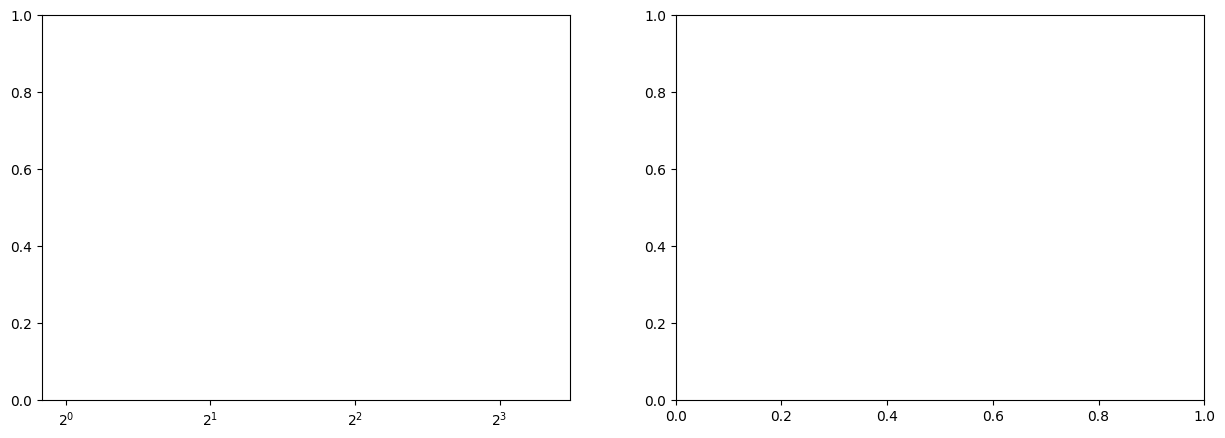

In [ ]:
labels = list(df_diag.columns)

fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# ax[0] es la grafica del error y ax[1] es la grafica de los nodos

# Accedo a las columnas del dataframe
def getMean(df, col):
    return [np.mean(df[label][col]) for label in labels]

# Grafico de linea sizes vs train_error_mean, usar escala logaritmica en base 2 el eje x
# Muestro los numeros sin notacion cientifica
# Configurar el eje x para que no use notación científica
axs[0].set_xscale('log', base=2)
axs[0].plot(sizes, getMean(df_diag, "train_error"), label='Entrenamiento - Diagonales', color='blue')
axs[0].plot(sizes, getMean(df_par, "train_error"), label='Entrenamiento - Paralelas', color='red')
axs[0].plot(sizes, getMean(df_diag, "test_error"), label='Test - Diagonales', color='blue', ls='--')
axs[0].plot(sizes, getMean(df_par, "test_error"), label='Test - Paralelas', color='red', ls='--')
axs[0].set_title("Error de entrenamiento y test")
axs[0].set_xlabel("Tamaño del dataset")
axs[0].set_ylabel("Error")
axs[0].legend()
axs[0].xaxis.set_major_formatter(mticker.ScalarFormatter())

# Grafico una linea horizontal en y = 0.10
axs[0].axhline(y=0.10, color='black', lw=0.5, ls='--')

axs[1].set_xscale('log', base=2)
axs[1].plot(sizes, getMean(df_diag, "node_sizes"), label='Diagonales', color='blue')
axs[1].plot(sizes, getMean(df_par, "node_sizes"), label='Paralelas', color='red')
axs[1].set_title("Tamaño del arbol")
axs[1].set_xlabel("Tamaño del dataset")
axs[1].set_ylabel("Nodos del arbol")
axs[1].legend()
axs[1].xaxis.set_major_formatter(mticker.ScalarFormatter())


plt.plot()

Tanto el error de entrenamiento como el error de test parecen converger a 0.10.

### Explicacion

Cuando trabaja con datos continuos en un intervalo $[a,b]$, el arbol de decisión realiza splits buscando un punto $m$
donde partir el rango de manera que del lado izquierdo quedan todos los valores $x\leq m$ y del lado derecho $x>m$, siempre
intentando minimizar la entropía en cada split. Entonces llegar a la hoja de un arbol para un valor $(x,y)$ es equivalente a ejecutar
las condiciones $x\leq m_1$, $y>m2$, $x>m_3$, $y\leq m_4, \dots$, donde $m_1, m_2, m_3, m_4, \dots$ son puntos de splits elegidos durante
la construción del arbol. El resultado final es que el punto $(x,y)$ queda encasillado en una cuadricula del plano $xy$ determinada por las
condiciones ejecutadas.

Cada cuadricula sera dominada por el color más predominante en la misma, las fronteras de los cuadrados de distinto color aproximan a una curva
que efectivamente divide los puntos equitativamente.

Un buen candidato para la curva que divide los puntos tanto en las diagonales como en las paralelas es en la zona donde se intersecan las zonas,
ya que como se generan con una distribución normal, los puntos se concentran mas en los centros y escasean en los bordes.

La función de densidad de probabilidad de una distribución normal multivariada $N$ se define como:
$$f_N(\mathbf{x})=\dfrac{\exp\left(-1/2\cdot (\mathbf{x}-\mu)^T \cdot \Sigma^{-1} \cdot (\mathbf{x}-\mu)\right)}{\sqrt{(2\pi)^k|\Sigma|}}$$

Donde $\mathbf x$ es un vector real de $k$ dimensiones, $\Sigma$ es una matriz de covarianza(la cual tiene que ser definida positiva) y $\mu$ es el centro de la distribución.

La curva interseción de dos distribuciones normales multivariadas $N_1$ y $N_2$ viene determinada por aquellos puntos que cumplen que:

$$f_{N_1}(\mathbf x) = f_{N_2}(\mathbf x)$$


Esa curva parece dificil de determinar pero afortunadamente tanto en el caso de las diagonales como en las paralelas se cumple que ambas normales tienen la misma
matriz de covarianza $\Sigma$ que a su vez es una matriz diagonal definida positiva.
Por lo que se puede razonar algebraicamente para llegar a una expresión más simple:


$f_{N_1}(\mathbf x) = f_{N_2}(\mathbf x)$

$\iff$

$\dfrac{\exp\left(-1/2\cdot (\mathbf{x}-\mu_1)^T \cdot \Sigma^{-1} \cdot (\mathbf{x}-\mu_1)\right)}{\cancel{\sqrt{(2\pi)^k|\Sigma|}}} = \dfrac{\exp\left(-1/2\cdot (\mathbf{x}-\mu_2)^T \cdot \Sigma^{-1} \cdot (\mathbf{x}-\mu_2)\right)}{\cancel{\sqrt{(2\pi)^k|\Sigma|}}}$

$\iff$

${\cancel{\exp}\left(-1/2\cdot (\mathbf{x}-\mu_1)^T \cdot \Sigma^{-1} \cdot (\mathbf{x}-\mu_1)\right)} = {\cancel{\exp}\left(-1/2\cdot (\mathbf{x}-\mu_2)^T \cdot \Sigma^{-1} \cdot (\mathbf{x}-\mu_2)\right)}$

$\iff$

$\cancel{-1/2}\cdot (\mathbf{x}-\mu_1)^T \cdot \Sigma^{-1} \cdot (\mathbf{x}-\mu_1) = \cancel{-1/2}\cdot (\mathbf{x}-\mu_2)^T \cdot \Sigma^{-1} \cdot (\mathbf{x}-\mu_2)$

$\iff (\Sigma = \sigma^2 \cdot I \quad \therefore \quad \Sigma^{-1} = \sigma^{-2} \cdot I)$

$(\mathbf{x}-\mu_1)^T \cdot \cancel{\sigma^{-2}} \cdot (\mathbf{x}-\mu_1) = (\mathbf{x}-\mu_2)^T \cdot \cancel{\sigma^{-2}} \cdot (\mathbf{x}-\mu_2)$

$\iff$

$|\mathbf{x}-\mu_1|^2 = |\mathbf{x}-\mu_2|^2$

De esta forma podemos caracterizar la intersección de las normales:


$$\boxed{f_{N_1}(\mathbf x) = f_{N_2}(\mathbf x) \iff |\mathbf{x}-\mu_1|^2 = |\mathbf{x}-\mu_2|^2}$$

Para el caso de las diagonales, la formula se reduce a:

$$
(x-1)^2 + (y-1)^2 = (x+1)^2 + (y+1)^2
\iff

y=-x
$$

Mientras que para las paralelas, la formula equivale a:

$$
(x-1)^2 + y^2 = (x+1)^2 + y^2
\iff

x=0
$$

Lo cual se condice con lo observado en las graficas:


#### Explicación de los errores

En la grafica de train error vs test error se observo que el error converge a un valor similar a 0.10, este valor no es casualidad y viene
del hecho de que los puntos se generan con una distribución normal multivariada.

Los puntos $(X,Y)$ del plano se generan con una distribución normal bivariada.

Las diagonales se generan con matriz de covarianza:

$$\Sigma = 2 \cdot \begin{pmatrix}
    C^2 & 0 \\
    0 & C^2
\end{pmatrix}$$

Mientras que en las paralelas la matriz de covarianza es:

$$\Sigma = \begin{pmatrix}
    C^2 & 0 \\
    0 & C^2
\end{pmatrix}$$

En ambos casos la covarianza $\operatorname{cov}(X,Y)=0$, esto quiere decir que $X$ e $Y$
son variables aleatorias independientes y podemos ver a cada una como una distribución normal univariada.

Suponiendo que nos guiamos por el siguiente criterio para las paralelas:

$$\operatorname{Clase}(x,y) = \begin{cases}
    0 & \text{si } x\leq 0 \\
    1 & \text{si } x>0
\end{cases}$$

¿Cual es la probabilidad de equivocarnos?.

Los puntos de clase $0$ se generan con centro en $(-1,-1)$. Esto quiere decir que $X_0,Y_0 \sim \mathcal{N}(-1,C)$,
mientras que la clase 1 se genera con centro en $(1,1)$, por lo que $X_1,Y_1 \sim \mathcal{N}(1,C)$.

Este clasificador clasifica mal un punto de clase 0 cuando $X_0> 0$, la propiedad de este suceso puede calcularse
con una tabla de distribuciones normales.

$P(X_0> 0) = 0.0999$.

El clasificador clasifica mal un punto de clase 1 cuando $X_1 \leq 0$, con una tabla de distribuciones normales se puede
calcular que:

$P(X_1< 0) = 0.0999$

Entonces dados 5000 puntos de clase 0, y 5000 puntos de clase 1 la probabilidad de equivocarse es:

$\dfrac{P(X_0>0)*5000 + P(X_1<0)*5000}{10000} = 0.0999$

Lo cual se condice con lo observado en las gráficas.

Para el caso de las diagonales se puede seguir un procedimiento similar.
(aunque este es poco mas complejo):

Clasificamos los puntos como:

$$\operatorname{Clase}(x,y) = \begin{cases}
    0 & \text{si } y\leq -x \\
    1 & \text{si } y > -x
\end{cases}$$

$X_0, Y_0 \sim \mathcal{N}(-1,C\sqrt 2)$
$X_1, Y_1 \sim \mathcal{N}(1,C\sqrt 2)$

La probabilidad de equivocarse si un punto es de clase 0 es:

$P(Y_0> -X_0) = P(X_0+Y_0> 0)$

$X_0+Y_0\sim \mathcal{N}(-2, 2\cdot C)$(la suma de dos variables normales es normal, las medias se suman y las varianzas tambien).

Por tabla se tiene que:

$P(X_0+Y_0 > 0) = 0.0999$

De la misma forma, si un punto es de clase 1, la probabilidad de fallar es:

$P(Y_1 \leq -X_1) = P(X_1+Y_1 \leq 0)$

$X_1+Y_1\sim \mathcal{N}(2, 2\cdot C)$(de nuevo por suma de normales).

Por tabla:

$P(X_1+Y_1 \leq 0) = 0.0999$

Entonces en $10000$ clasificaciones, donde la mitad son de clase 0 y la otra mitad de clase 1
la probabilidad de fallar es:

$\dfrac{P(X_0>0)*5000 + P(X_1<0)*5000}{10000} = 0.0999 \sim 0.010$

Lo cual se condice con lo observado en la grafica.

#### Explicación tamaño del árbol

El tamaño del árbol aumenta a medida que se aumenta el tamaño del test de entrenamiento pero decae abruptamente cuando se pasa el limite
de los 1000 nodos. Esto se debe a que a partir de los 1000 nodos, la intersección de las zonas de puntos es más marcada y por ende el árbol
la identifica más rápido (esto puede observarse en las gráficas de las muestras).

----

### Ejercicio 3

Para este ejercicio tenemos que generar los conjuntos variando el valor de $C$ entre $0.5$ y $2.5$ con incrementos de $0.5$, mantiendo $d$ y $n$ constantes  ($5$ y $250$ respectivamente).

Ademas de un test de entrenamiento con $n = 10000$ 

Generamos 20 conjuntos para cada valor de $C$, registrando para cada uno el error de test.

In [17]:
t = Tree()


def makeDF(fun):
    df = pd.DataFrame({
        0.5: [],
        1.0: [],
        1.5: [],
        2.0: [],
        2.5: []
    })

    CANT_SETS = 20

    for c in [0.5, 1.0, 1.5, 2.0, 2.5]:
        test = fun(10000, 5, c)
        test_error = []
        for i in range(CANT_SETS):
            # Genero los datos
            data = fun(250, 5, c)

            # Entreno el arbol con los datos
            t.fit(data['input'].tolist(), data['output'].tolist())

            # Calculo el error de entrenamiento
            pred_test = t.predict(test['input'].tolist())
            test_error.append(1 - accuracy_score(test['output'], pred_test))
            time.sleep(0.1)
    
        df[c] = test_error

    return df

df_diag = makeDF(diagonales)
df_par = makeDF(paralelas)

print("Estos son los datos para el caso de diagonales")
display(df_diag)

print("Estos son los datos para el caso de paralelas")
display(df_par)
    

Estos son los datos para el caso de diagonales


,0.5,1.0,1.5,2.0,2.5
0,0.1067,0.2535,0.3810,0.4060,0.4567
1,0.0877,0.2428,0.3442,0.4000,0.4389
2,0.0871,0.2373,0.3381,0.3818,0.4339
3,0.0960,0.2804,0.3642,0.3791,0.4513
4,0.0748,0.2596,0.3618,0.4244,0.4510
5,0.0862,0.2481,0.3430,0.4219,0.4509
6,0.0943,0.2522,0.3401,0.3853,0.4144
7,0.0886,0.2477,0.3351,0.3952,0.4542
8,0.1051,0.2447,0.3702,0.4159,0.4228
9,0.1076,0.2300,0.3652,0.3904,0.4264


Estos son los datos para el caso de paralelas


,0.5,1.0,1.5,2.0,2.5
0,0.0365,0.2090,0.2954,0.4106,0.4132
1,0.0355,0.2395,0.3630,0.4017,0.4195
2,0.0295,0.2469,0.3127,0.3999,0.4361
3,0.0224,0.1983,0.3366,0.4096,0.4034
4,0.0230,0.1995,0.3410,0.3670,0.4277
5,0.0228,0.2150,0.3557,0.4056,0.4256
6,0.0244,0.1991,0.3089,0.4100,0.4179
7,0.0224,0.2348,0.3261,0.4049,0.4127
8,0.0569,0.1990,0.3410,0.4165,0.4154
9,0.0244,0.2112,0.3064,0.3851,0.4642


A partir de este dato se puede generar la grafica del error de test

[]

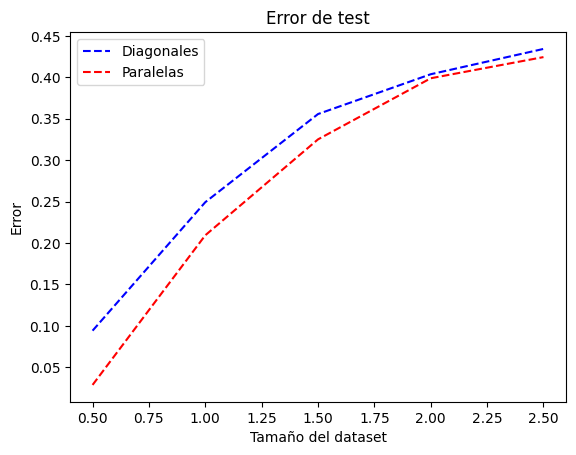

In [18]:
labels = list(df_diag.columns)

# Accedo a las columnas del dataframe
def getMean(df):
    return [np.mean(df[label]) for label in labels]



# Grafico de linea sizes vs train_error_mean, usar escala logaritmica en base 2 el eje x
# Muestro los numeros sin notacion cientifica
# Configurar el eje x para que no use notación científica
#axs[0].set_xscale('log', base=2)
plt.plot(labels, getMean(df_diag), label='Diagonales', color='blue', ls='--')
plt.plot(labels, getMean(df_par), label='Paralelas', color='red', ls='--')
plt.title("Error de test")
plt.xlabel("Tamaño del dataset")
plt.ylabel("Error")
plt.legend()

plt.plot()

El valor del error aumenta a medida que aumenta el valor de $C$. Este valor influye mucho en el desvió
estándar y por lo tanto a medida que aumenta los puntos se alejan del centro. La intersección de las distribuciones
normales no se modifica con el desvió estándar, por lo que es más probable que los puntos que se alejan del centro sean mal
clasificados, lo que aumenta el error.

### Ejercicio 3.1
### Calculo del error mínimo

En el ejercicio 2 se vio que el clasificador ideal para el problema de las diagonales y las paralelas
consiste en dividir las clases por la intersección de las distribuciones normales.

En este caso los puntos son de 5 dimensiones, $(x,y,z,w,v)$.

La intersección en las diagonales esta determinada por el hiperplano:

$x+y+z+w+v = 0$

Todas las variables que determinan a las coordenadas son normales y tienen covarianza
0 por lo que a su vez son independientes.  La suma de las mismas es por lo tanto una
distribución normal, la media de la suma es la suma de las medias y la varianza es la
suma de las varianzas.

En las diagonales de clase 0

$X_0+Y_0+Z_0+W_0+V_0 \sim \mathcal{N}(-5, 25 \cdot C^2)$

La probabilidad de clasificar mal un punto de clase 0 es
$P(X_0+Y_0+Z_0+W_0+V_0 > 0)$, el cual varia para cada $C$. Dicho valor puede
calcularse con la tabla de la distribución normal.

$C=0.5 \implies P = 0.0288$

$C=1 \implies P = 0.1587$

$C=1.5 \implies P = 0.2525$

$C=2 \implies P = 0.3085$

$C=2.5 \implies P = 0.3446$

Y en las diagonales de clase 1

$X_1+Y_1+Z_1+W_1+V_1 \sim \mathcal{N}(5. 25 \cdot C^2)$

Ambas distribuciones estan relacionadas, el producto de un escalar por una distribución
normal es una distribución normal donde la media es igual a la media origianl por el escalar
y la varianza se multiplica por el escalar al cuadrado. Luego $-(X_0+Y_0+Z_0+W_0+V_0)$ y 
$X_1+Y_1+Z_1+W_1+V_1$ tienen la misma distribución.

La probabilidad de clasificar mal un punto de clase 1 es $P(X_1+Y_1+Z_1+W_1+V_1 < 0)$.

$P(X_1+Y_1+Z_1+W_1+V_1 < 0) = P(-(X_0+Y_0+Z_0+W_0+V_0) < 0) = P(X_0+Y_0+Z_0+W_0+V_0 > 0)$

Por lo que las probabilidades son las mismas para cada $C$, independientemente de la clase. Asi que la proporción promedio
de puntos mal clasificados se mantiene.


En las paralelas, la zona que mejor separa las normales es la región del hiperespacio que cumple que:

$x=0$

La probabilidad de clasificar mal un punto de clase 0 es $P(X>0)$, la cual esta determinada por la
distribución normal $\mathcal{N}(-1,C^2)$

Los valores del error minimo para esta distribución son los mismos que en el problema de las paralelas, esto pasa
porque:

$P(X>0) = P(5\cdot X>0) = P(X_0+Y_0+Z_0+W_0+V_0 > 0)$

Esto pasa porque $5\cdot X \sim \mathcal{N}(-5,25\cdot C^2)$, la misma distribución que $X_0+Y_0+Z_0+W_0+V_0$

Y para la clase $1$ $(\mathcal{N}(1,C^2))$ también son los mismos valores ya que:

$P(X<0) = P(-5\cdot X > 0) = P(X_0+Y_0+Z_0+W_0+V_0 > 0)$

Por lo que el error minimo se mantiene en ambos problemas:

Esta es la grafica del error actualizada con el error minimo posible:

[]

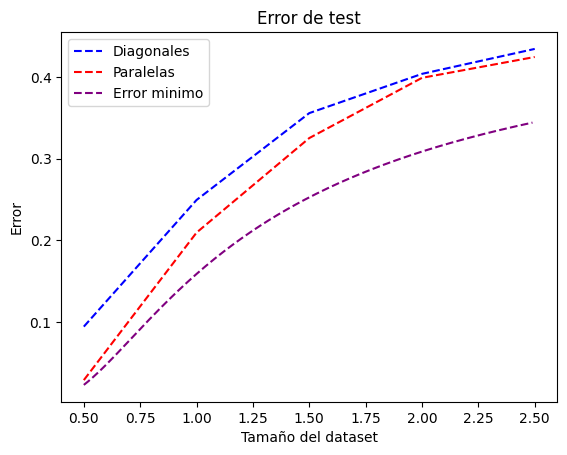

In [19]:
labels = list(df_diag.columns)


# ax[0] es la grafica del error y ax[1] es la grafica de los nodos

# Accedo a las columnas del dataframe
def getMean(df):
    return [np.mean(df[label]) for label in labels]

# Calculo del error minimo a partir de la cdf de la distribucion normal
def cummulativeNormal(C):
    return 0.5 * (1 + math.erf((-1) / (C*math.sqrt(2))))

# Rango de valores para el error minimo
r = np.arange(0.5, 2.5, 0.01)

# Grafico de linea sizes vs train_error_mean, usar escala logaritmica en base 2 el eje x
# Muestro los numeros sin notacion cientifica
# Configurar el eje x para que no use notación científica
#axs[0].set_xscale('log', base=2)
plt.plot(labels, getMean(df_diag), label='Diagonales', color='blue', ls='--')
plt.plot(labels, getMean(df_par), label='Paralelas', color='red', ls='--')
plt.plot(r, [cummulativeNormal(x) for x in r], label='Error minimo', color='purple', ls='--')
plt.title("Error de test")
plt.xlabel("Tamaño del dataset")
plt.ylabel("Error")
plt.legend()

plt.plot()

---

# Ejercicio 4

En este ejercicio tenemos que generar conjuntos variando el valor de $d$ entre $2$, $4$, $8$, $16$ y $32$, mantiendo $C$ y $n$ constantes ($0.78$ y $250$ respectivamente).

Ademas de un test de entrenamiento con $n = 10000$ 

Generamos 20 conjuntos para cada valor de $d$, registrando para cada uno el error de test y el error de train.

In [20]:
t = Tree()

#diag = lambda c: diagonales(250, 5, c)
#par = lambda c: paralelas(250, 5, c)

def makeDF(fun):
    df = pd.DataFrame({
        2: {},
        4: {},
        8: {},
        16: {},
        32: {}
    })

    CANT_SETS = 20

    for d in [2, 4, 8, 16, 32]:
        test = fun(10000, d, 0.78)
        train_error = []
        test_error = []
        for i in range(CANT_SETS):
            # Genero los datos
            data = fun(250, d, 0.78)

            # Entreno el arbol con los datos
            t.fit(data['input'].tolist(), data['output'].tolist())

            pred_train = t.predict(data['input'].tolist())
            pred_test = t.predict(test['input'].tolist())

            train_error.append(1 - accuracy_score(data['output'].tolist(), pred_train))
            test_error.append(1 - accuracy_score(test['output'].tolist(), pred_test))
            time.sleep(0.1)
    
        df[d] = {
            'train_error': train_error,
            'test_error': test_error
        }

    return df

df_diag = makeDF(diagonales)
df_par = makeDF(paralelas)

print("Estos son los datos para el caso de diagonales")
display(df_diag)

print("Estos son los datos para el caso de paralelas")
display(df_par)
    

Estos son los datos para el caso de diagonales


,2,4,8,16,32
train_error,"[0.07999999999999996, 0.05600000000000005, 0.0...","[0.06000000000000005, 0.06399999999999995, 0.0...","[0.07999999999999996, 0.06799999999999995, 0.0...","[0.08399999999999996, 0.07199999999999995, 0.0...","[0.052000000000000046, 0.04800000000000004, 0...."
test_error,"[0.12080000000000002, 0.16590000000000005, 0.1...","[0.14849999999999997, 0.17110000000000003, 0.1...","[0.237, 0.23429999999999995, 0.234099999999999...","[0.3113, 0.2983, 0.2875, 0.30200000000000005, ...","[0.373, 0.34009999999999996, 0.349099999999999..."


Estos son los datos para el caso de paralelas


,2,4,8,16,32
train_error,"[0.07199999999999995, 0.040000000000000036, 0....","[0.06399999999999995, 0.06000000000000005, 0.0...","[0.06000000000000005, 0.03200000000000003, 0.0...","[0.03600000000000003, 0.04800000000000004, 0.0...","[0.052000000000000046, 0.06000000000000005, 0...."
test_error,"[0.13180000000000003, 0.11860000000000004, 0.1...","[0.13070000000000004, 0.1523, 0.15300000000000...","[0.1422, 0.11729999999999996, 0.18999999999999...","[0.12490000000000001, 0.13770000000000004, 0.1...","[0.16459999999999997, 0.16300000000000003, 0.1..."


A partir de los datos generamos la grafica

[]

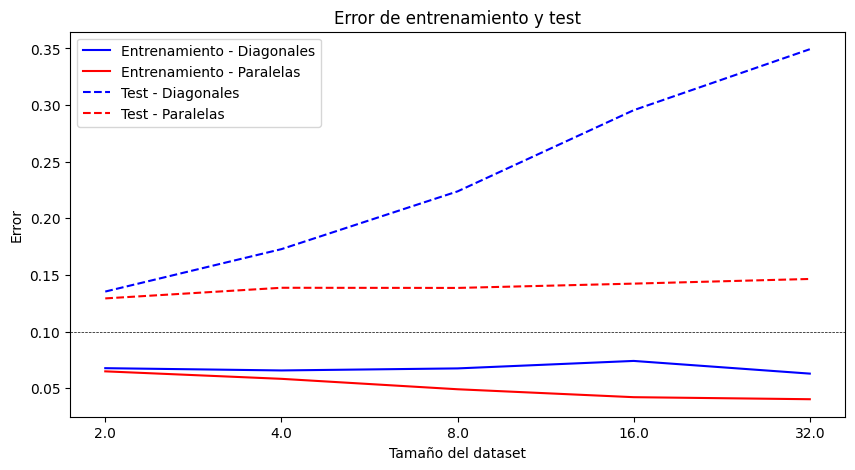

In [21]:
labels = list(df_diag.columns)

fig, axs = plt.subplots(1, 1, figsize=(10, 5))

# ax[0] es la grafica del error y ax[1] es la grafica de los nodos

# Accedo a las columnas del dataframe
def getMean(df, col):
    return [np.mean(df[label][col]) for label in labels]

# Grafico de linea sizes vs train_error_mean, usar escala logaritmica en base 2 el eje x
# Muestro los numeros sin notacion cientifica
# Configurar el eje x para que no use notación científica
axs.set_xscale('log', base=2)
axs.plot(labels, getMean(df_diag, "train_error"), label='Entrenamiento - Diagonales', color='blue')
axs.plot(labels, getMean(df_par, "train_error"), label='Entrenamiento - Paralelas', color='red')
axs.plot(labels, getMean(df_diag, "test_error"), label='Test - Diagonales', color='blue', ls='--')
axs.plot(labels, getMean(df_par, "test_error"), label='Test - Paralelas', color='red', ls='--')
axs.set_title("Error de entrenamiento y test")
axs.set_xlabel("Tamaño del dataset")
axs.set_ylabel("Error")
axs.legend()
axs.xaxis.set_major_formatter(mticker.ScalarFormatter())

# Grafico una linea horizontal en y = 0.10
axs.axhline(y=0.10, color='black', lw=0.5, ls='--')


plt.plot()

En base a los resultado obtenidos se pude observar que:
* Train Error: En las diagonales aumenta conforme aumenta $d$. En las paralelas en un principio aumenta (mas lento que las diagonales), pero a partir de un cierto $d$ este empieza a disminuir.
* Test Error: En las paralelas disminuye con el aumento de $d$. En las diagonales parecería que tiende a disminuir/quedarse constante


El diferente comportamiento en ambos modelos se puede deber a que los centros son distintos, haciendo que al calcula la distribución normal esta varié. Esto hace que los punto alejados del centro sean mal clasificados, aumentando el error.

Pero como en las paralelas todas las componentes son nulas salvo la primera el aumento de dimension no tiene un impacto tan grande como en las diagonales que tiene todas sus componentes distintas de cero. 

Esto hace que en las paralelas, al aumenta las dimensiones, los puntos no se vean afectados (solo importa la primer componente). Por lo que tienden a estar mas cerca del centro, disminuyendo asi los errores. Mientras que en el caso de las diagonales los puntos se encuentran mas dispersos, lo que hace que los errores aumenten.
 
Otra cosa a notar es que el error del Test tiende a crecer, esto se debe a que al aumentar el $d$ se va introduciendo mas ruido, el cual puede producir overfitting.


---

# Ejercicio 5

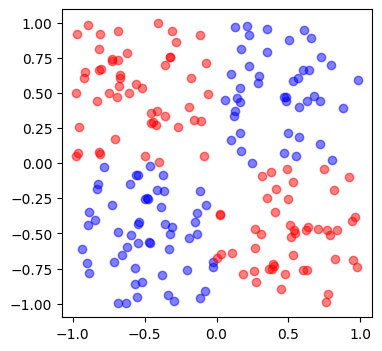

In [22]:
# cargo el archivo xor.csv
# El archivo tiene dos columnas con floats y una columna con 0s y 1s
plt.figure(figsize=(4, 4))
df = pd.read_csv('xor.csv')

# Accedo a la tercera columna
X = df.iloc[:, :2]
Y = df.iloc[:, 2].values

# Obtengo la primera columna como un array de numeros
A = X.iloc[:, 0].values
B = X.iloc[:, 1].values

puntos = list(zip(A, B, Y))

X1 = [x for x,_,c in puntos if c == 0]
X2 = [x for x,_,c in puntos if c == 1]
Y1 = [y for _,y,c in puntos if c == 0]
Y2 = [y for _,y,c in puntos if c == 1]

plt.scatter(X1, Y1, color='blue', alpha=0.5)
plt.scatter(X2, Y2, color='red', alpha=0.5)

plt.show()


Viendo la gráfica anterior y pensando un poco cual seria el árbol mas simple para clasificar los datos llegamos a que el mismo tendría una forma parecida a esta:

![titulo](NuestraGrafica.webp)


Ahora si intentamos crear un árbol con los siguientes parámetros (dados por la cátedra) tenemos los siguiente.


[Text(0.6041666666666666, 0.9285714285714286, 'x[0] <= -0.909\nentropy = 1.0\nsamples = 149\nvalue = [74.0, 75.0]'),
 Text(0.5208333333333334, 0.7857142857142857, 'entropy = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(0.5625, 0.8571428571428572, 'True  '),
 Text(0.6875, 0.7857142857142857, 'x[0] <= 0.81\nentropy = 0.999\nsamples = 143\nvalue = [74, 69]'),
 Text(0.6458333333333333, 0.8571428571428572, '  False'),
 Text(0.6041666666666666, 0.6428571428571429, 'x[1] <= 0.234\nentropy = 0.994\nsamples = 134\nvalue = [73, 61]'),
 Text(0.375, 0.5, 'x[0] <= -0.102\nentropy = 0.965\nsamples = 82\nvalue = [50, 32]'),
 Text(0.16666666666666666, 0.35714285714285715, 'x[1] <= -0.056\nentropy = 0.365\nsamples = 43\nvalue = [40, 3]'),
 Text(0.08333333333333333, 0.21428571428571427, 'entropy = 0.0\nsamples = 38\nvalue = [38, 0]'),
 Text(0.25, 0.21428571428571427, 'entropy = 0.971\nsamples = 5\nvalue = [2, 3]'),
 Text(0.5833333333333334, 0.35714285714285715, 'x[1] <= -0.02\nentropy = 0.821\nsamples = 39

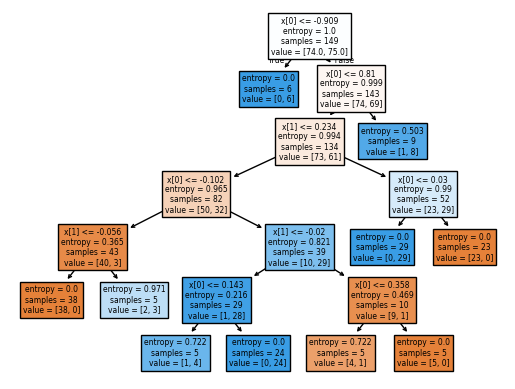

In [23]:
clf = DecisionTreeClassifier(criterion="entropy",min_impurity_decrease=0.002,random_state=0,min_samples_leaf=5)

coords = [[x,y] for x,y,_ in puntos]
clases = [c for _,_,c in puntos]

X_train, X_test, Y_train, Y_test = train_test_split(coords, clases, random_state=0)

clf.fit(X_train, Y_train)
plt.figure()
tree.plot_tree(clf, filled=True)

¿Por que ocurre esto? Esto puede ocurrir debido al valor del min_imputiy, el cual hace que se realicen mas split de los que se debería. 
A eso hay que sumarle la posibilidad de que haya ruido en los datos lo que genera que el árbol aumente su tamaño (overfitting).

Ahora aplicaos el siguiente setup DecisionTreeClassifier(criterion="entropy",min_impurity_decrease=0.03,random_state=0,min_samples_leaf=5) sobre el árbol

[Text(0.4, 0.8333333333333334, 'x[0] <= -0.909\nentropy = 1.0\nsamples = 149\nvalue = [74.0, 75.0]'),
 Text(0.2, 0.5, 'entropy = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(0.30000000000000004, 0.6666666666666667, 'True  '),
 Text(0.6, 0.5, 'x[0] <= 0.81\nentropy = 0.999\nsamples = 143\nvalue = [74, 69]'),
 Text(0.5, 0.6666666666666667, '  False'),
 Text(0.4, 0.16666666666666666, 'entropy = 0.994\nsamples = 134\nvalue = [73, 61]'),
 Text(0.8, 0.16666666666666666, 'entropy = 0.503\nsamples = 9\nvalue = [1, 8]')]

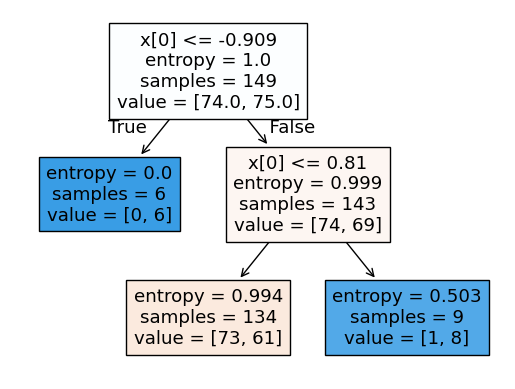

In [24]:
clf = DecisionTreeClassifier(criterion="entropy",min_impurity_decrease=0.03,random_state=0,min_samples_leaf=5)

coords = [[x,y] for x,y,_ in puntos]
clases = [c for _,_,c in puntos]

X_train, X_test, Y_train, Y_test = train_test_split(coords, clases, random_state=0)

clf.fit(X_train, Y_train)
plt.figure()
tree.plot_tree(clf, filled=True)

Analicemos lo que sucede al utilizar el siguiente árbol: 
**DecisionTreeClassifier(criterion="entropy",min_impurity_decrease=0.03,random_state=0,min_samples_leaf=5)**

En primer lugar se tiene que el criterion, el random_state y el min_samples_leaf, tienen los valores que venimos usando a lo largo del TP. El único valor distinto es el min_impurity_decrease, el caul ahora es de 0.03.

Como se menciono al inicio del TP, el min_impurity_decrease es un valor que controla si se realiza un split o no, mientras mas bajo es mas probable es que se realice el split.

Entonces, al tener un valor demasiado "grande" para este caso, el árbol que se genera tiende a realizar menos split, evitando que el árbol crezca. Este parámetro tiene un impacto en el overfitting, ya que puede evita divisiones que no aportan suficiente mejora.